# Simple vector analysis

In this notebook, we will do some simple operations and analysis on vector data. We will use a shapefile that includes all the county boundaries for the state of Maine. We will subset the boundaries for one county (Hancock), merge and dissolve the polygons that represent that county, calculate the area of the dissolved feature, and then save the resulting data to a file. We will use the geopandas module to perform these operations.

First, we will import all the modules that we need for this project. In this case, we just need geopandas.

In [6]:
import geopandas as gpd

Next, we will read in the file that we need for this projects, which is located in the "data" folder. We then take a quick look at the dataset we're looking with.

In [39]:
boundaries = gpd.read_file('./data/maine_counties.shp')
boundaries

,OBJECTID,COUNTY,CNTYCODE,LAND,ISLAND,TAG,GlobalID,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,NaN,NaN,y,y,n,15817685-9a9d-41de-94cf-d265d8fb0d75,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,8.003660e+03,3.685274e+02,"POLYGON ((-68.12773 43.97323, -68.12800 43.973..."
1,2,NaN,NaN,y,y,n,b6f16ced-d41e-4dfd-a643-a4d04fc13b8a,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,1.712458e+04,6.144653e+02,"POLYGON ((-67.09989 44.50026, -67.10004 44.500..."
2,3,NaN,NaN,y,y,n,75853e1b-93a4-49fb-908c-1e187235f78e,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,3.602056e+03,2.558386e+02,"POLYGON ((-67.09606 44.50386, -67.09612 44.503..."
3,4,NaN,NaN,y,y,n,d26b05bd-0c0e-478a-a8bb-d9e713d80497,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,1.915658e+03,1.717037e+02,"POLYGON ((-67.08525 44.53134, -67.08513 44.531..."
4,5,Cumberland,05,n,n,n,2ccb8440-ad0e-466f-a81d-c9a352b4382f,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,7.702424e+08,1.088664e+06,"POLYGON ((-69.86782 43.91827, -69.86746 43.918..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7191,7192,Sagadahoc,23,y,n,y,14f1025c-ad7e-44a3-bfaa-1f1f7b085463,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,3.653775e+08,1.711905e+05,"POLYGON ((-69.76671 44.15242, -69.76593 44.151..."
7192,7193,Somerset,25,y,n,y,22db81aa-75bb-459b-b569-f8cf8b9e3964,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,1.059507e+10,7.863273e+05,"POLYGON ((-70.02324 46.57350, -70.02242 46.573..."
7193,7194,Waldo,27,y,n,y,c9e593b3-24eb-42f8-a785-818d6926520c,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,1.903342e+09,3.129270e+05,"POLYGON ((-69.37003 44.75412, -69.36987 44.754..."
7194,7195,Washington,29,y,n,y,2c9cca82-335a-45f1-aa4b-a031dcf61636,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,7.065051e+09,1.551801e+06,"POLYGON ((-67.71933 45.68054, -67.71784 45.679..."


Hmm, there's a lot of features in there (7196).

Now let's get a list of all the column names.

In [12]:
boundaries.keys()

Index(['OBJECTID', 'COUNTY', 'CNTYCODE', 'LAND', 'ISLAND', 'TAG', 'GlobalID',
       'created_us', 'created_da', 'last_edite', 'last_edi_1', 'Shape__Are',
       'Shape__Len', 'geometry'],
      dtype='object')

Hmm, there's a lot of data we don't really need. We'll come back to that later

So let's get all the features for just one county (Hancock) and let's take a look at what we're working with. 

In [16]:
hancock = boundaries.loc[boundaries['COUNTY']=='Hancock']
hancock

,OBJECTID,COUNTY,CNTYCODE,LAND,ISLAND,TAG,GlobalID,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
880,881,Hancock,09,n,n,n,c1cd9fc9-6070-4999-93ae-a1206bdd1b07,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,1.689265e+09,2.053091e+06,"POLYGON ((-68.80930 44.66779, -68.80932 44.667..."
881,882,Hancock,09,y,n,n,6fc23124-bca9-4663-9a33-dba4b676c690,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,9.904917e+04,6.829873e+03,"POLYGON ((-68.35254 44.27031, -68.35239 44.270..."
882,883,Hancock,09,y,n,n,09bc96dc-13d0-429e-b8ca-97b331b08ff2,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,2.702735e+03,3.667390e+02,"POLYGON ((-67.99211 44.50554, -67.99183 44.504..."
883,884,Hancock,09,y,y,n,68709dae-bb71-4240-b30d-6173e6b2341e,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,5.896329e+03,4.078094e+02,"POLYGON ((-68.49398 44.08288, -68.49401 44.082..."
884,885,Hancock,09,y,y,n,95e6caf3-9228-495e-a8f8-6d81664fa8c4,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,2.775596e+03,3.510689e+02,"POLYGON ((-68.52304 44.08488, -68.52308 44.084..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,1952,Hancock,09,y,y,n,90f9337c-253a-45c2-b61c-5d40cf9587e9,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,2.213348e+03,1.934482e+02,"POLYGON ((-68.19460 44.56927, -68.19473 44.569..."
1952,1953,Hancock,09,y,y,n,8b7f8e91-10e0-4c55-8605-87ce9247eb76,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,4.926825e+03,2.579804e+02,"POLYGON ((-68.24960 44.57895, -68.24978 44.578..."
1953,1954,Hancock,09,y,y,n,41db1a8d-2b60-4782-adeb-29f12cbfd311,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,2.156501e+04,6.359074e+02,"POLYGON ((-68.23458 44.58112, -68.23462 44.581..."
1954,1955,Hancock,09,y,y,n,1a6dece4-ed33-4489-b42f-4e482d7fc3e6,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,9.411106e+02,1.224622e+02,"POLYGON ((-68.83687 44.61890, -68.83694 44.618..."


Still a lot of features (1076). Must be a bunch of islands or something.

Let's take a look at the features plotted.

<Axes: >

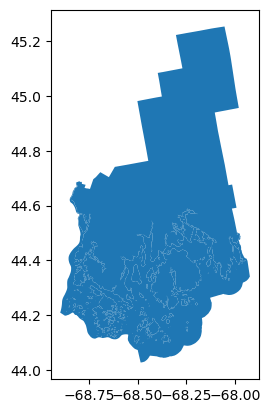

In [17]:
hancock.plot()

Yep, looks like a bunch of islands.

OK, so let's go ahead and merge / dissolve all the features for Hancock county and then plot the result.

<Axes: >

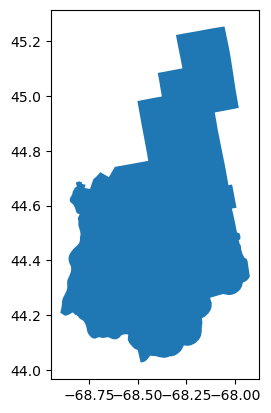

In [18]:
hancock_dis = hancock.dissolve()
hancock_dis.plot()

That looks much cleaner!

Let's also calculate the area of the dissolved feature.

In [41]:
hancock_dis.area

/var/folders/c9/kt2m2l395ls6ydtkn22r4cj00000gp/T/ipykernel_50749/39197954.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hancock_dis.area


0    0.687966
dtype: float64

Uh oh! We are working with data in a geographic coordinate system, which uses decimal degrees. As such, we're not going to get area data that makes sense. We need to convert the data to a projected coordinate system first and then calculate area.

We're going to convert the data to a projected coordinate system with the code 32619. This is the coordinate system for WGS84 UTM Zone 19N, which includes Maine. We will then calculate area.

In [28]:
hancock_dis_prj = hancock_dis.to_crs(32619)
area = hancock_dis_prj.area
area

0    6.068909e+09
dtype: float64

The area output, which is in square meters, looks reasonable.

Now let's take a look at the attribute data for the dissolved features.

In [25]:
hancock_dis_prj

,geometry,OBJECTID,COUNTY,CNTYCODE,LAND,ISLAND,TAG,GlobalID,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len
0,"POLYGON ((580093.325 4928626.018, 580102.450 4...",881,Hancock,09,n,n,n,c1cd9fc9-6070-4999-93ae-a1206bdd1b07,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,Emily.Pettit@maine.gov_maine,2021/08/02 18:45:04.314,1.689265e+09,2.053091e+06


There's a lot of data here that we don't actually need, and some of it is incorrect anyway (e.g. the objectid value of 881 is just an artifact of the dissolve process). For now, we just want the county name and geometry data, so let's subset those out.

In [42]:
hancock = hancock_dis_prj[["geometry", 'COUNTY']]
hancock

,geometry,COUNTY
0,"POLYGON ((580093.325 4928626.018, 580102.450 4...",Hancock


We'd like another column with the correct area info, so let's insert that column into the dataframe.

In [43]:
hancock.insert(2, 'area', area, True)
hancock

,geometry,COUNTY,area
0,"POLYGON ((580093.325 4928626.018, 580102.450 4...",Hancock,6.068909e+09


This all looks good, so the last thing we'll do is save it to a new file and we're done!

In [37]:
hancock.to_file('./data/hancock_county.shp')